In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_path = "airplanedataset/Train/"
test_path = "airplanedataset/Test/"

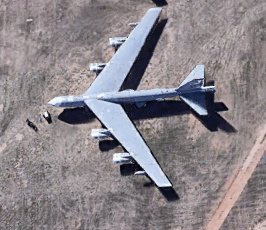

In [6]:
img = load_img(test_path + "B-52/3-1.jpg")
img

In [7]:
img_to_array(img).shape

(230, 266, 3)

In [9]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [10]:
numberOfAirplaneTypes = 5 # 5 tane uçak modelimiz var

In [11]:
vgg = VGG16()

In [12]:
vgg_layers = vgg.layers
vgg_layers

In [14]:
our_vgg_layers = len(vgg_layers) - 1 # Yukarıdaki katmanların sonuncusu (Dense layer) hariç kendi layer'ımıza eklemeliyiz

model = Sequential()
for i in range(our_vgg_layers):
    model.add(vgg_layers[i])

In [15]:
for layers in model.layers:
    layers.trainable = False
    
model.add(Dense(numberOfAirplaneTypes, activation = "softmax"))

print(model.summary()) # En alttaki kendi katmanımız

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [16]:
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [17]:
batch_size = 4
model.fit_generator(train_data, steps_per_epoch= 400//batch_size, epochs = 8, validation_data = test_data, validation_steps = 200//batch_size)

C:\Users\hilal\AppData\Local\Temp\ipykernel_5800\649129807.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data, steps_per_epoch= 400//batch_size, epochs = 8, validation_data = test_data, validation_steps = 200//batch_size)


Epoch 1/8
100/100 [==============================] - 193s 2s/step - loss: 0.6017 - accuracy: 0.8311 - val_loss: 0.2019 - val_accuracy: 0.9400


Tests

In [19]:
img = Image.open("a10.jpg").resize((224,224))

In [20]:
img = np.array(img)

In [21]:
img.shape

(224, 224, 3)

In [22]:
img.ndim

3

In [23]:
img = img.reshape(-1,224,224,3)

In [24]:
img.shape

(1, 224, 224, 3)

In [25]:
img.ndim

4

In [26]:
img = preprocess_input(img)

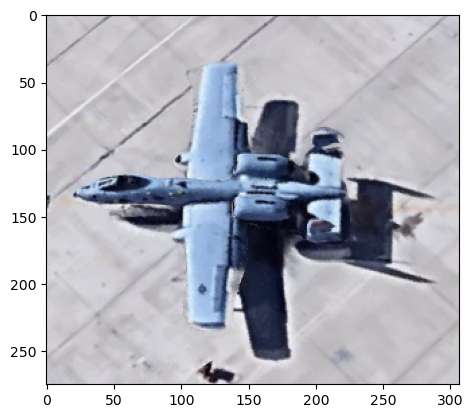

In [27]:
image = load_img("a10.jpg")
plt.imshow(image)

In [29]:
preds = model.predict(img)
preds # Sırasıyla uçağın benzediği modelin doğruluk oranını dizi olarak gösterir, yukarıdaki softmax özelliği sayesinde

1/1 [==============================] - 0s 185ms/step


array([[9.82826829e-01, 1.66402338e-03, 4.08148859e-04, 2.70502758e-03,
        1.23959035e-02]], dtype=float32)

In [30]:
image_classes = ["A-10 Thunderbolt", "Boeing B-52", "Boeing E-3 Sentry", "F-22 Raptor", "KC-10 Extender"]
result = np.argmax(preds[0]) # En yüksek değerli tahmini alır
print(image_classes[result]) # TAHMİN

A-10 Thunderbolt
